RNA shape: (85, 17535)
ATAC shape: (85, 363046)


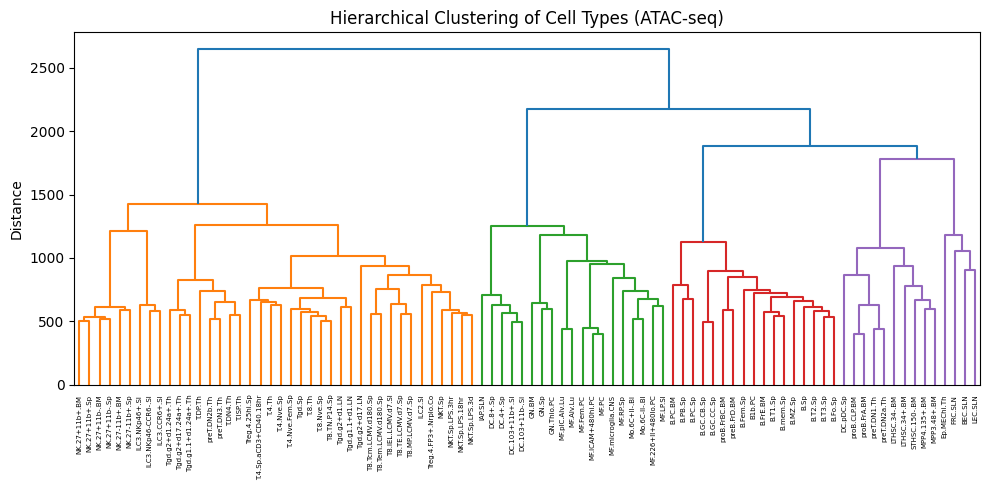

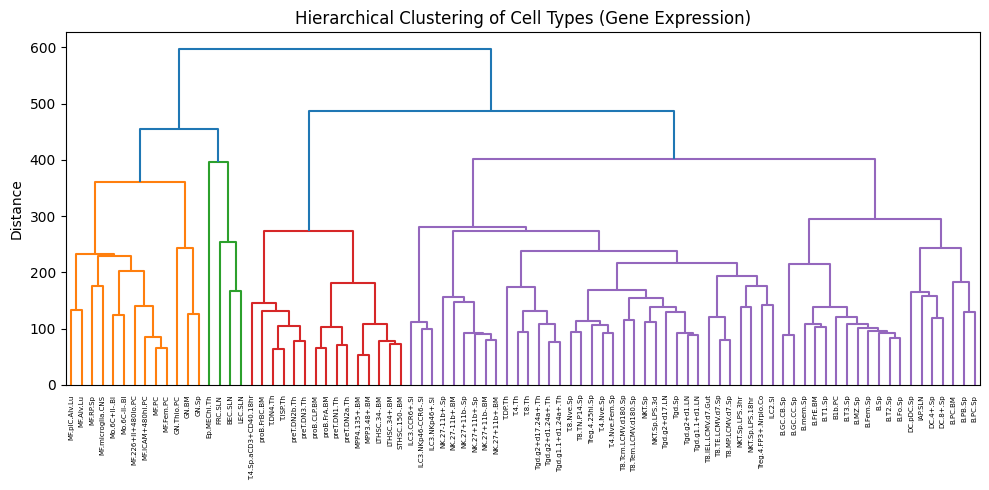

Cophenetic correlation between RNA and ATAC clustering: nan
Cophenetic correlation coefficient (RNA): 0.635
Cophenetic correlation coefficient (ATAC): 0.591


In [11]:
import importlib
import functions
importlib.reload(functions)
functions.set_user('Helen')
data = functions.call_data_clean(p_threshold=1.3)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.spatial import ConvexHull
import scanpy as sc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


#ATAC
ATAC_scores = data['norm_scores']
ATAC_scores_T = ATAC_scores.T

scaler = StandardScaler()
ATAC_T_scaled = pd.DataFrame(
    scaler.fit_transform(ATAC_scores_T),
    index=ATAC_scores_T.index,
    columns=ATAC_scores_T.columns
)
linkage_atac = linkage(ATAC_T_scaled, method='ward')


#RNA
RNA_T = data['RNA_seq_T']

# Z-score normalization
scaler = StandardScaler()
RNA_seq_log_scaled = pd.DataFrame(
    scaler.fit_transform(RNA_seq_log),
    index=RNA_seq_log.index,
    columns=RNA_seq_log.columns
)

linkage_RNA = linkage(RNA_seq_log_scaled, method='ward')

common_samples = RNA_seq_log_scaled.index.intersection(ATAC_T_scaled.index)
RNA_seq_log_scaled_common = RNA_seq_log_scaled.loc[common_samples].sort_index()
ATAC_T_scaled_common = ATAC_T_scaled.loc[common_samples].sort_index()

#both matrices same shape?
print("RNA shape:", RNA_seq_log_scaled_common.shape)
print("ATAC shape:", ATAC_T_scaled_common.shape)

#dendogram atac
plt.figure(figsize=(10, 5))
dendrogram(linkage_atac, labels=ATAC_T_scaled.index, leaf_rotation=90)
plt.title("Hierarchical Clustering of Cell Types (ATAC-seq)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# dendrogram rna
plt.figure(figsize=(10, 5))
dendrogram(linkage_RNA, labels=RNA_seq_log_scaled.index, leaf_rotation=90)
plt.title("Hierarchical Clustering of Cell Types (Gene Expression)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

#distance matrices
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet
from scipy.stats import spearmanr


coph_RNA, _ = cophenet(linkage_RNA, pdist(RNA_seq_log_scaled))
coph_atac, _ = cophenet(linkage_atac, pdist(ATAC_T_scaled))
from scipy.stats import spearmanr
corr, _ = spearmanr(coph_RNA, coph_atac)
print(f"Cophenetic correlation between RNA and ATAC clustering: {corr:.3f}")


# To compare, make sure the arrays are the same length (they won't be unless the input matrices are the same shape)
# If you want to compare the cophenetic distances, you need to use the same set of samples/features for both.
# Otherwise, just print both cophenetic correlation coefficients separately:

print(f"Cophenetic correlation coefficient (RNA): {coph_RNA.mean():.3f}")
print(f"Cophenetic correlation coefficient (ATAC): {coph_atac.mean():.3f}")



